### Descripción del notebook

Red Neuronal con los train generados por Rodrigo en los notebooks R1_day y R2_day

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
## import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import scipy as scp
import seaborn as sns

import datetime 

# ----
import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense,Dropout

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Cargar dataframes

In [4]:
train = pd.read_csv("../data/final_train.csv")

In [8]:
test = pd.read_csv("../data/final_test.csv")

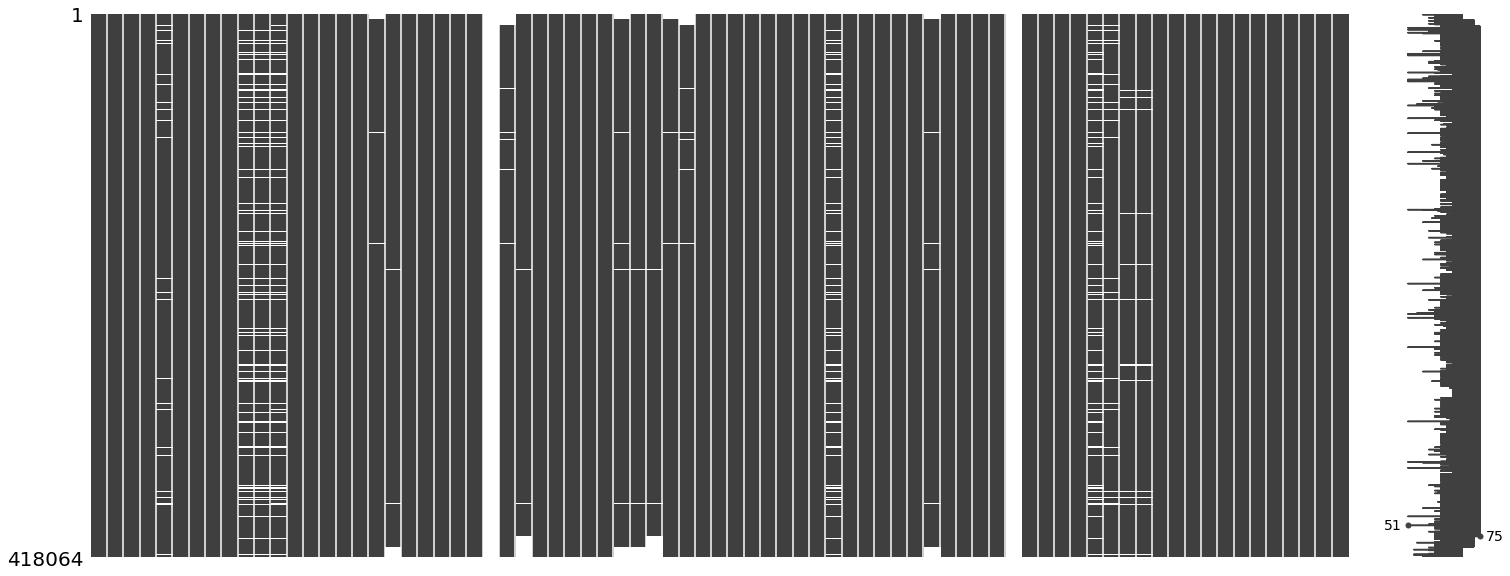

In [6]:
msno.matrix(train)

# Neural Network

## Select X and Y

In [17]:
for i in train.columns:
    if (train[i].isnull().all()):
        print(i)

kurtosis_stock_shift1
ratio_kurtosis_stock_shift1


In [20]:
drop_cols = ['sales', 'date_number', 'product_id', 'block_id',
             'position_max', 'position_min', 'std_position', 'ratio_std_pos', 'diff_position','kurtosis_stock_shift1','ratio_kurtosis_stock_shift1'
            ]

X_train = train.loc[:,[c for c in train.columns if c not in drop_cols]]
y_train = train[['sales']]
X_test = test.loc[:,[c for c in train.columns if c not in drop_cols]]

In [21]:
y = np.array(y_train)

In [22]:
y = np.reshape(y,(-1,1))

## Normalizar/Escalar  X

Primero se entrena el escalador/normalizador, para que prepare los rangos, y luego se transforma

In [24]:
scaler = MinMaxScaler()
print(scaler.fit(X_train))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [26]:
xscale=scaler.transform(X_train)

In [30]:
xscale[np.isnan(xscale)] = -1.0

## Train/Test split

Este split no es válido ni mucho menos, porque está escogido al azar. Debería cogerlo y splitear en funcion del tiempo, ya que es una serie temporal. O hacer crossvalidacion

In [31]:
X_train, X_test, y_train, y_test = train_test_split(xscale, y,test_size=0.25)

# Neural Network Model

In [38]:
# Early Stopping
callbacks = [EarlyStopping(monitor='val_loss',
                           min_delta=0.0,
                           patience=5,
                           verbose=0,
                           mode='min',
                           restore_best_weights=True)]

In [46]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                4288      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 7,457
Trainable params: 7,457
Non-trainable params: 0
_________________________________________________________________


In [56]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 256)               17152     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 60,417
Trainable params: 60,417
Non-trainable params: 0
_________________________________________________________________


In [63]:
model = Sequential()
model.add(Dense(2048, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mae', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 2048)              137216    
_________________________________________________________________
dense_38 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 1025      
Total params: 2,236,417
Trainable params: 2,236,417
Non-trainable params: 0
_________________________________________________________________


# Train NN

In [64]:
hypams = {
    'epochs':100,
    'batch_size':100,
    'verbose':1
}

history = model.fit(X_train,
                    y_train,
                    epochs=hypams['epochs'],
                    batch_size=hypams['batch_size'], 
                    verbose=hypams['verbose'],
                    callbacks=callbacks, 
                    validation_data=(X_test,y_test))

Train on 313548 samples, validate on 104516 samples
Epoch 1/100
313548/313548 [==============================] - 67s 213us/sample - loss: 8.9812 - val_loss: 8.1290
Epoch 2/100
313548/313548 [==============================] - 66s 210us/sample - loss: 8.0858 - val_loss: 8.1576
Epoch 3/100
313548/313548 [==============================] - 65s 208us/sample - loss: 7.8040 - val_loss: 7.6069
Epoch 4/100
313548/313548 [==============================] - 66s 211us/sample - loss: 7.5882 - val_loss: 7.4873
Epoch 5/100
313548/313548 [==============================] - 69s 220us/sample - loss: 7.4421 - val_loss: 7.5051
Epoch 6/100
313548/313548 [==============================] - 64s 206us/sample - loss: 7.3558 - val_loss: 7.3059
Epoch 7/100
313548/313548 [==============================] - 66s 211us/sample - loss: 7.2467 - val_loss: 7.4367
Epoch 8/100
313548/313548 [==============================] - 63s 202us/sample - loss: 7.1684 - val_loss: 7.1263
Epoch 9/100
313548/313548 [=========================

## Graphs for loss

dict_keys(['loss', 'val_loss'])


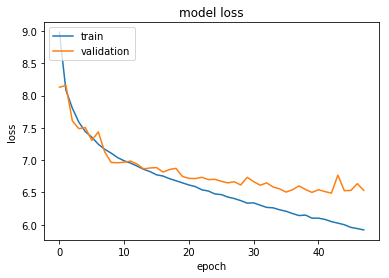

In [65]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()